In [1]:
# executar a primeira vez para clonar o repo da rede
# !git clone https://github.com/ultralytics/yolov5
# !pip install -r yolov5/requirements.txt


In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

---

### 📁 Dataset Configurado para YOLOv5

O dataset está configurado dentro da pasta `yolov5`, com a seguinte estrutura:

```
yolov5/
├── dataset/
│   ├── train/
│   │   ├── images/
│   │   └── labels/
│   ├── valid/
│   │   ├── images/
│   │   └── labels/
│   └── test/
│       ├── images/
│       └── labels/
├── spongebob.yaml
```

---

### 📝 Arquivo `spongebob.yaml`

```yaml
train: dataset/train/images
val: dataset/valid/images
test: dataset/test/images

nc: 3
names: ['SpongeBob', 'PatrickStar', 'Squidward']
```

---

> ✅ O arquivo `.yaml` está corretamente configurado para treinamento com **YOLOv5** ou **YOLOv8**.

---


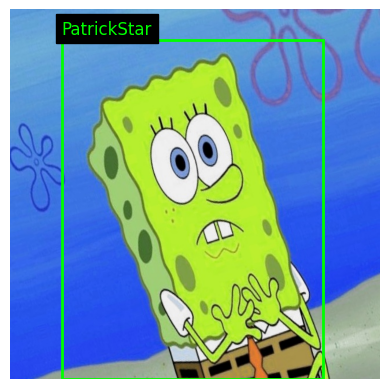

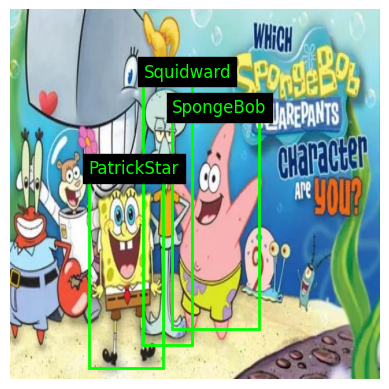

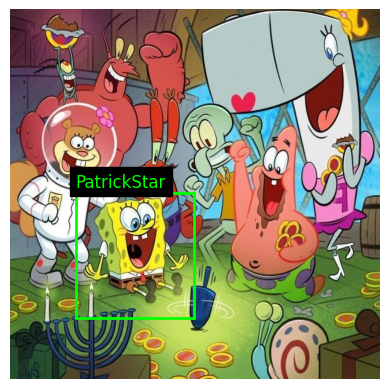

In [6]:
# VERIFICA IMAGENS ALEATÓRIAS DO DATASET


base_path = "yolov5/dataset"
image_dir = os.path.join(base_path, "train/images")
label_dir = os.path.join(base_path, "train/labels")

# nome das classes (conforme spongebob.yaml)
class_names = ['SpongeBob', 'PatrickStar', 'Squidward']

# função para desenhar bounding boxes
def plot_image_with_boxes(img_path, label_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                class_id, x_center, y_center, bw, bh = map(float, line.strip().split())
                x = (x_center - bw / 2) * w
                y = (y_center - bh / 2) * h
                bw *= w
                bh *= h

                rect = patches.Rectangle((x, y), bw, bh, linewidth=2, edgecolor='lime', facecolor='none')
                ax.add_patch(rect)
                ax.text(x, y - 10, class_names[int(class_id)], color='lime', fontsize=12, backgroundcolor='black')
    else:
        print(f"Label file not found: {label_path}")

    plt.axis('off')
    plt.show()

# visualizar 3 imagens aleatórias
sample_images = os.listdir(image_dir)[:3]

for img_name in sample_images:
    img_path = os.path.join(image_dir, img_name)
    label_path = os.path.join(label_dir, img_name.replace(".jpg", ".txt"))
    plot_image_with_boxes(img_path, label_path)



### 🚀 Comando de Treinamento com YOLOv5

Utilize a célula abaixo para iniciar o treinamento do seu modelo com o dataset dos personagens:

```python
!python yolov5/train.py \
    --img 640 \
    --batch 16 \
    --epochs 50 \
    --data spongebob.yaml \
    --weights yolov5s.pt \
    --name spongebob_detector
```

---

### 🔍 Explicação dos Parâmetros

- `--img 640`: tamanho das imagens de entrada (pode ajustar para 416, 512, etc).
- `--batch 16`: número de imagens por batch (ajuste conforme sua GPU).
- `--epochs 50`: número de épocas de treinamento.
- `--data yolov5/spongebob.yaml`: arquivo de configuração do dataset.
- `--weights yolov5s.pt`: modelo base a ser usado (YOLOv5s, mais leve e rápido).
- `--name spongebob_detector`: nome da pasta onde os resultados do experimento serão salvos (`runs/train/spongebob_detector`).

---

> 💡 Dica: Certifique-se de estar com as dependências instaladas e que o arquivo `spongebob.yaml` está no mesmo diretório ou com caminho correto.


In [33]:
# treinando o modelo com nosso dataset
!python yolov5/train.py --img 640 --batch 16 --epochs 50 --data yolov5/spongebob.yaml --weights yolov5s.pt --name spongebob_detector


^C


---

### 🧪 Rodando Inferência com o Modelo Treinado

Após o treino, use o código abaixo para detectar os personagens em novas imagens (por exemplo, da pasta de teste):

```python
!python detect.py \
    --weights yolov5/runs/train/spongebob_detector/weights/best.pt \
    --img 640 \
    --source yolov5/dataset/test/images \
    --conf 0.25 \
    --name spongebob_infer
```

---

### 🔍 Explicação dos Parâmetros

- `--weights`: caminho para o modelo treinado (melhor versão após treino).
- `--img 640`: tamanho da imagem usada na inferência (deve bater com o do treino).
- `--source`: pasta com imagens para inferência (ou um caminho para vídeo/webcam).
- `--conf 0.25`: confiança mínima para mostrar a detecção.
- `--name`: nome da pasta onde os resultados serão salvos (`runs/detect/spongebob_infer`).

---

### 📂 Onde ver os resultados?

Após rodar o comando acima, veja as imagens com detecção em:

```
yolov5/runs/detect/spongebob_infer/
```

---

In [ ]:
!python detect.py --weights yolov5/runs/train/spongebob_detector/weights/best.pt --img 640 --source yolov5/dataset/test/images --conf 0.25 --name spongebob_infer